# Generating data distributions #

## Monte Carlo technique ##

Often you will need to simulate data distributions from experiments or theories to then compare with real data. This is called Monte Carlo technique and is a form of integration. 

<div style="background-color:#FFCCCB">

### Inverse transform Ask whether to have this as red?

If the desired probability distribution function (pdf) is $f(x)$ in the range $-\infty \le x \le \infty$ then its cumulative distribution up to a point $a$ i.e. $ \int_{-\infty}^a f(x) dx =F(a) $ is itself a random variable with uniform probability. Thus if you can invert this calculation, you can generate the random distribution that you desire. Let's take a concrete example of wanting to generate a distribution that has a pdf of $x^2$ for $ -2 \le x \lt 2$. We can then say:

$u=F(x') = \int_{-2}^{x'} x^2 dx = \left[ \dfrac{x^3}{3} \right]_{-2}^{x'}$

This will be a uniform function between $-\dfrac{8}{3}$ and $\dfrac{8}{3}$. If we can invert this, we can then apply the inversion to a random number within that range to get the desired pdf. i.e. if :

$u=F(x)$


then:

$x=F^{-1}(u)$


In this case:

$F^{-1}(u)= \sqrt[3]{3u}$ between $-\dfrac{8}{3} \le u \le \dfrac{8}{3}$

Let's see what this looks like as code.

In [ ]:
import numpy as np
import pylab as pl
import numpy.random as npr 
import scipy.interpolate as spi

1.9999996576641585 -1.9999989060914451


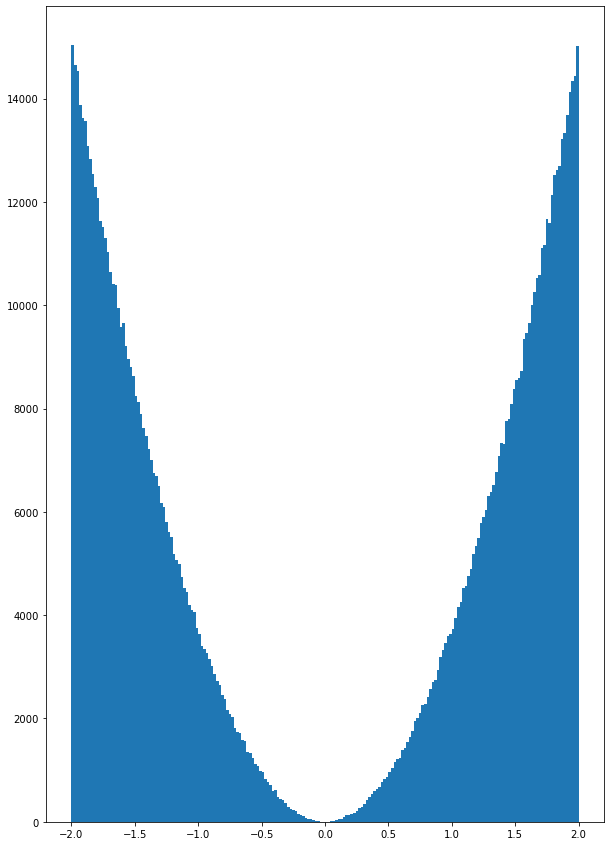

In [73]:
def inv(u):
    return np.cbrt(3*u)


# this part of the code could be way more efficient. How would you improve it? Try different approaches.

x=[]

nr=1000000

for i in range(nr):
    u=npr.uniform(low=-8./3., high=8./3.)
    x.append(inv(u))
    
    
x=np.array(x)
print(x.max(), x.min())
pl.hist(x,bins=200)

pl.show()
    

### Numerical inverse transform

The function that you have may be difficult to either integrate or invert. Howevever, provided you can calculate the function numerically, you can also integrate it numerically by summing the entries in the numpy array. This is done by setting the integral (i.e. sum) to equal 1 and then sampling between [0,1]. You will then need to interpolate between the steps in your integration. This can either be linear or cubic spline.


See below:

1.0


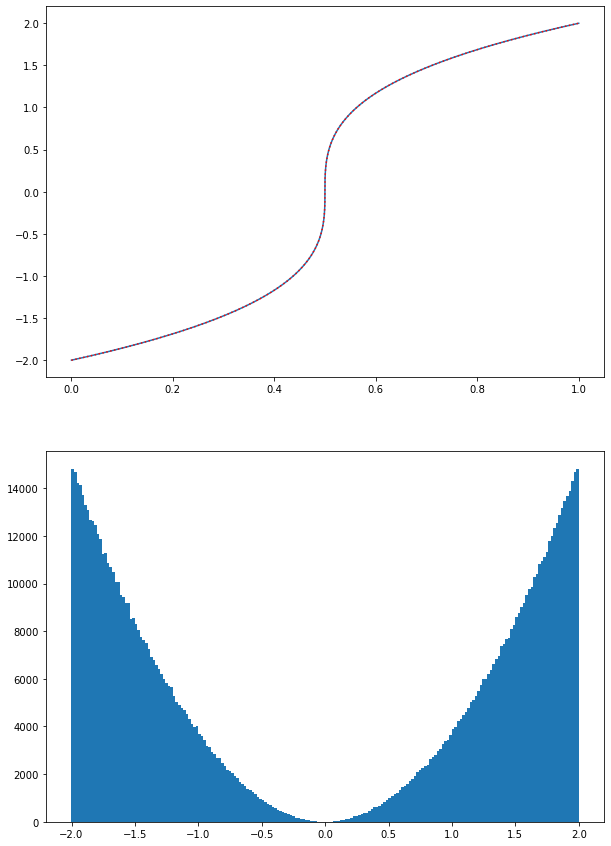

In [74]:
pl.rcParams['figure.figsize'] = [10, 15] 


x=np.arange(-2,2,0.0011) # step deliberately chosen to not exactly hit 0 as splines don't like no change so avoid exactly zero
xsq=x*x
y=xsq.cumsum()
y=y/y[-1] #normalise to 1

print(y[-1])

pl.subplot(2,1,1)
pl.plot(y,x)

#now if we choose a value x between 0 TYPO and 1 we can map it to a value between -2 and 2
#you will need to interpolate - one way of doing this is with a cubic spline

#print(x)
#print(y)


f= spi.CubicSpline( y,x) # This version allows f to be valid outside of the spline - which is useful here
# check if the spline is any  good
pl.plot(y,f(y),"r:")



yr=npr.uniform(size=1000000)

xr=f(yr)

pl.subplot(2,1,2)
pl.hist(xr,bins=200)



pl.show()

### The accept reject method

If the distribution $f(x)$ is too complicated to invert even numerically then you can always use the accept/reject mechanism. Consider the following distribution (unusually, this time don't bother with the code just look at the distributions).

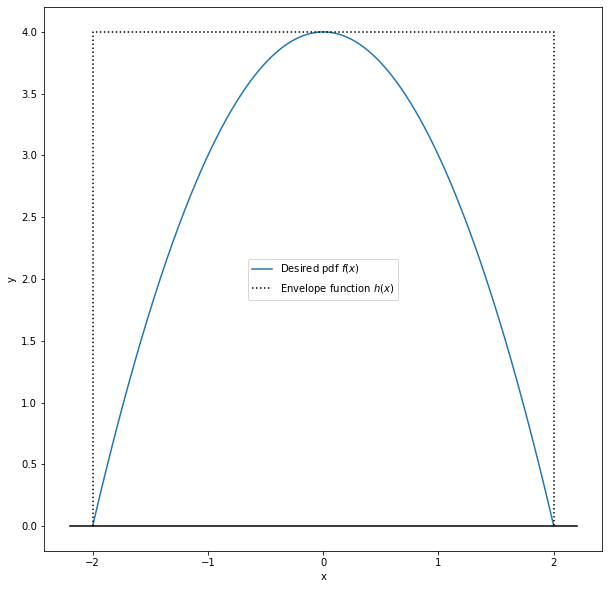

In [69]:
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

x=np.arange(-2,2,0.001)
y=f(x)

pl.plot(x,y,label="Desired pdf $f(x)$")
pl.plot([-2.2,2.2],[0,0], "k")
pl.plot([-2,-2,2,2],[0,4,4,0],"k:",label="Envelope function $h(x)$")
pl.xlabel("x")
pl.ylabel("y")
pl.legend()
pl.show()

You can then generate the desired pdf by generating flat random numbers in the desired range - in ths case $-2 \le x \le 2$, and then generate a second number from the uniform distribution $h(y)$.
If the second number is smaller than $f(x)$ at that point i.e. $f(x) \ge h(y)$ then you keep the point (x); otherwise you reject it. Many textbooks will tell you to normalise $f(x)$ and $h(x)$, this isn't needed as long as you scale the numbers appropriately. **This approach is very inefficient and should only be used when there really is no alternative - see the code below** 

In [ ]:
pl.rcParams['figure.figsize'] = [10, 10] 

def f(x): # the pdf that you want to generate
    return -x**2+4 # note only valid between +/- 2 as otherwise would be negative

icount=0 # just to count the number accepted
ntries=1000000 #setting the number of tries

xpdf=[]

for i in range(ntries):
    x=npr.uniform(low=-2,high=2)
    y=npr.uniform(low=0,high=4)
    if f(x) >= y: # if this the case then keep the point
        xpdf.append(x)
        icount=icount+1

print("Only a fraction of",icount/ntries," are kept") 
        
pl.hist(xpdf,bins=100)
        
pl.show()      

<div style="background-color:#C2F5DD">

## Exercise 1.

Generate a distribution of 1 million entries with a pdf of $\sin(x)$ between 0 and $\pi$. Do this by:

*a. inverting the  analytic integral* <br>
*b. integrating numerically* <br>
*c. using the accept/reject method* <br>

In [ ]:
#Write code here

## Inbuilt functions

Fortunately there are random number generators that will generate random numbers according to many of the different pdfs that you are likely to need. These exist in both [numpy.random](https://numpy.org/doc/1.16/reference/routines.random.html) and [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html). These are very efficient tuned generators so you should use them when you can.

<div style="background-color:#C2F5DD">

## Exercise 2

The purpose of this exercise is for you to familiarise yourselves with these generators. So pick three functions from each of numpy.random and scipy.stats and generate different distributions. Try generating them with different sizes and shapes and plotting them, working out the covariance matrix between them etc. It is best if you pick  distributions where you know what the expected distributions look like. This exercise is a little open ended but that is deliberate.

## Generating correlated variables - Cholesky decomposition

Some of the generators will be able to generate correlated random numbers for you (see for example [numpy.random.multivariate_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) ), however it is important that you understand how to do this yourself. There are actually several ways of doing this and one of the most popular is Cholesky decomposition. 

<div style="background-color:#FFCCCB">
    
## ask whether to have this red

If the covariance matrix is $\Sigma$ then this can be expressed as the product of two triangular matrices. If we take the lower triangle $L$ we can write $\Sigma=LL^T$ where $L^T$ is the transpose of $L$. If we take a vector of uncorrelated variables and multiply them by $L$ they will have the covariance described in $\Sigma$ i.e. if we if $x$ is a vector of uncorrelated random variables then $y=Lx$ will be a vector of correlated varaibles with covariance of $\Sigma$.

Consider the folloing simple example:

the lower traianular matrix
[[1.41421356 0.        ]
 [1.20208153 0.74498322]]
The product with the transpose
[[2.  1.7]
 [1.7 2. ]]
The measured covariance matrix is
[[1.99647445 1.69777707]
 [1.69777707 1.9983542 ]]


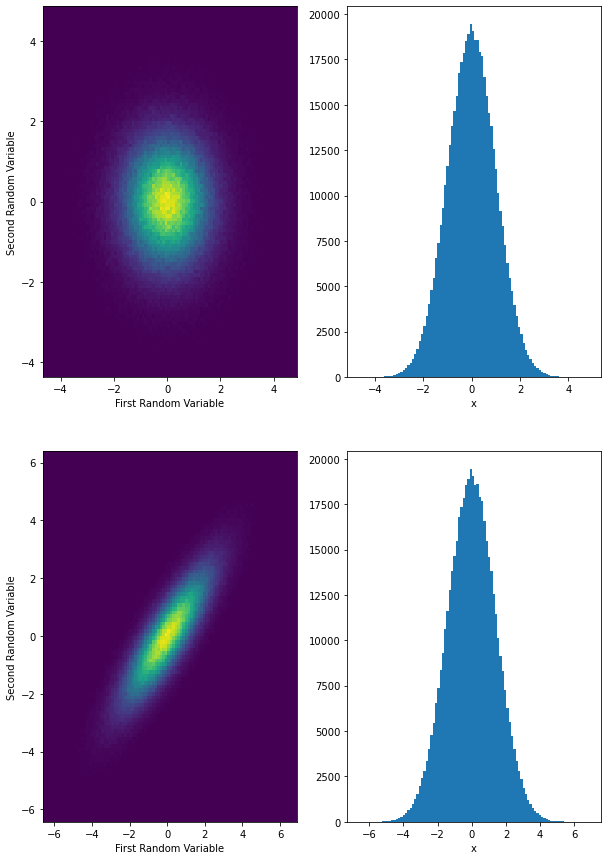

In [76]:
import scipy.linalg as spl

pl.rcParams['figure.figsize'] = [10, 15] 


# define the covariance matrix - because I will use unit Gaussians (because I am lazy) this is the same as the correlation matrix
Sig=np.array([[2, 1.7],
             [1.7,2]])

L = spl.cholesky(Sig, lower=True)

print("the lower triangular matrix")
print(L)
print("The product with the transpose")
print(np.dot(L,L.T))

#xuncor=npr.exponential(5, size=(2, 500000))
xuncor=npr.normal(0, 1, size=(2, 500000))
x=xuncor[0]
y=xuncor[1]




pl.subplot(2,2,1)
pl.hist2d(x,y,bins=100)
pl.xlabel("First Random Variable" )
pl.ylabel("Second Random Variable" )
# just plot a histo of one
pl.subplot(2,2,2)
pl.hist(x,bins=100)
pl.xlabel("x")


xcorr=np.dot(L,xuncor)
x=xcorr[0]
y=xcorr[1]

pl.subplot(2,2,3)
pl.hist2d(x,y,bins=100)
pl.xlabel("First Random Variable" )
pl.ylabel("Second Random Variable" )
pl.subplot(2,2,4)
pl.hist(x,bins=100)
pl.xlabel("x")

print("The measured covariance matrix is")
print(np.cov(xcorr))

pl.show()


<div style="background-color:#C2F5DD">

## Exercise 3

Because we are using Gaussians the individual distributions have kepr their shape.  Try using different distributions to investigate what happens when you apply a correlation.
